#연습
1. csv폴더 안에 num_1 폴더에 있는 chipotle.tsv 로드
2. order_id컬럼의 데이터의 타입을 str 변경(이유는? 통계요약정보(descibe)) 숫자형의 데이터만 계산
3. 가장 많이 주문한 item_name을 출력
4. item당 주문 총량의 top10을 바 그래프 표시
5. item_price의 '$'를 제거하고 데이터 타입을 float형태로 변경
6. 주문당 평균 계산 금액 출력 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1
df = pd.read_csv("../csv/num_1/chipotle.tsv", sep='\t') 

In [ ]:
# 2
df['order_id'] = df['order_id'].astype('str')

In [ ]:
# 3
# df.sort_values(['quantity'],ascending = False,inplace = True)
group_data = df.groupby('item_name').sum()['quantity'].sort_values(ascending=False)

group_data.index[0]

In [ ]:
# 4
group_data.head(10).plot.bar()

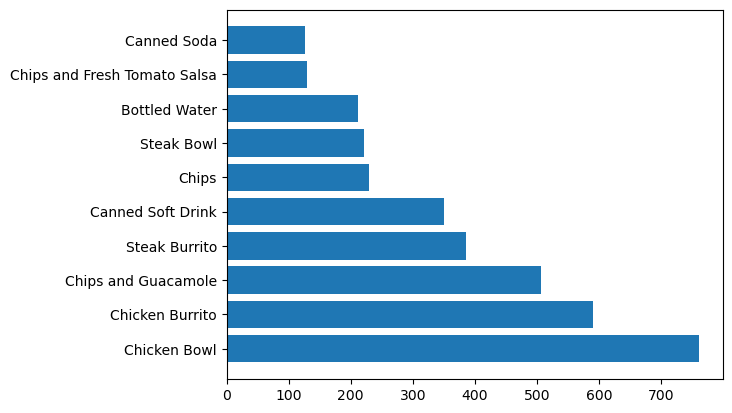

In [34]:
x = group_data.head(10).index
y = group_data.head(10)

plt.barh(x, y)
plt.show()

In [ ]:
# item_price의 $를 제거한다
# case1
df['item_price'].str.replace("$","")

In [ ]:
# case2
df['item_price'].str.lstrip("$")

In [ ]:
# case3
def change(x):
    # x의 데이터의 타입은? ->문자
    x.replace("$","")
    x.lstrip("$")
    return x

df['item_price'].apply(change)

In [ ]:
# case 4
df['item_price'] = df['item_price'].apply(lambda y:y.replace("$",""))

In [ ]:
# 5
df['item_price'] = df['item_price'].astype('float')

In [ ]:
# 6
df.groupby('order_id').sum()['item_price'].mean()

In [31]:
# chicken bowl 이 메뉴를 2개 이상 주문한 고객들이 주문한 chicken bowl의 평균 주문 수량
# df['quantity'] >= 2, df['item_name'] == chicken bowl
df.loc[(df['quantity']>=2)&(df['item_name'] == 'Chicken Bowl')]['quantity'].mean()

2.0606060606060606